<a href="https://colab.research.google.com/github/MDTanveerAlam1/ExcelR/blob/main/EDA_1_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
# Find Missing Values
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


#1. Data Cleaning and Preparation

In [5]:
# Handle missing values by imputing with column medians and assign also in df
df = df.copy()
for col in df.columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-5-066b8eb9779e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [6]:
# There is no Null value after assign the median in null value
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [7]:
# Detect and treat outliers using Z-scores
z_scores = np.abs((df - df.mean()) / df.std())
outliers = (z_scores > 3).sum()
print("Outliers detected in each column:\n", outliers)

Outliers detected in each column:
 LB          10
AC          18
FM          39
UC          11
DL          33
DS          16
DP          39
ASTV        10
MSTV        26
ALTV        38
MLTV        17
Width       10
Tendency    10
NSP         10
dtype: int64


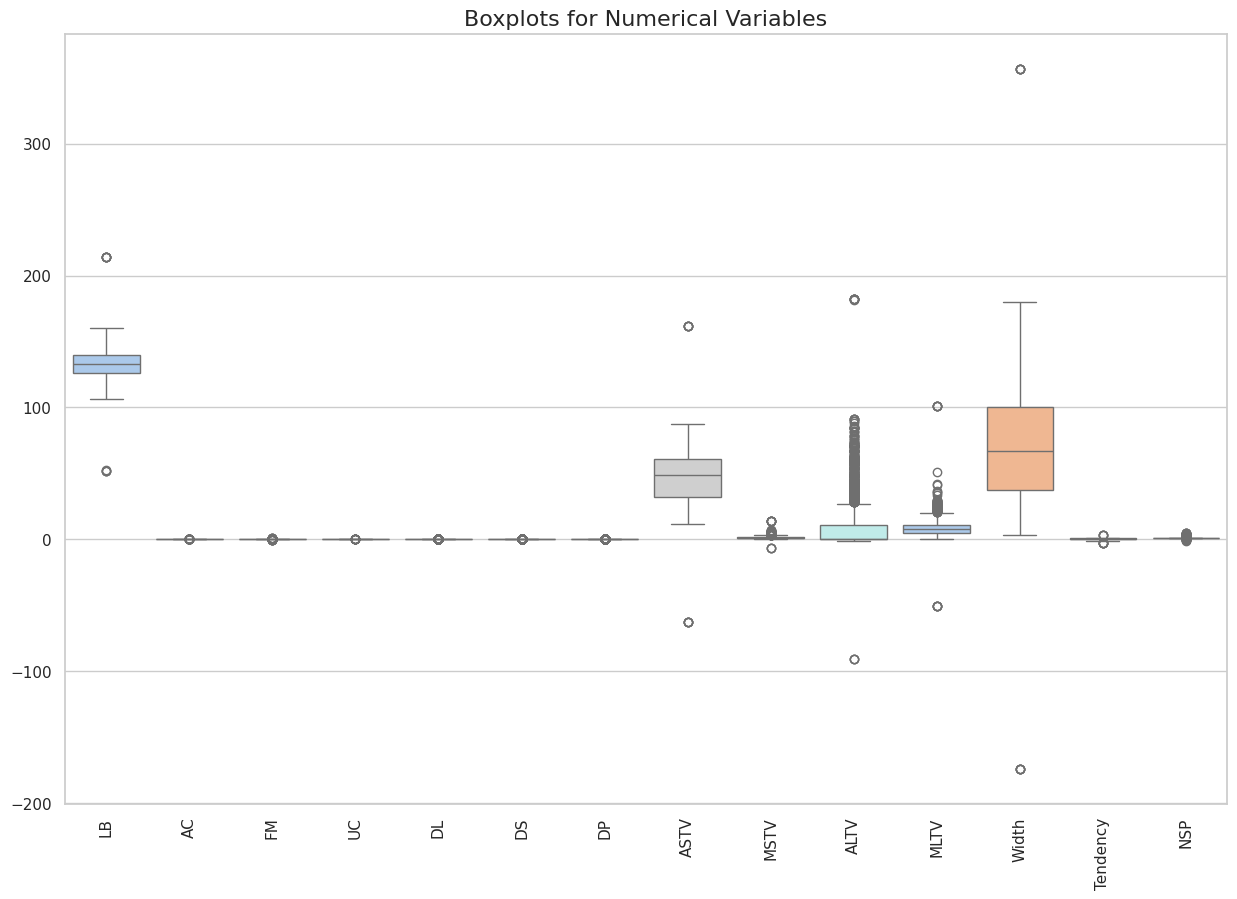

In [14]:
# Boxplots to detect outliers visually
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, palette="pastel")
plt.title('Boxplots for Numerical Variables', fontsize=16)
plt.xticks(rotation=90)
plt.show()

# 2. Statistical Summary

In [15]:
# Compute measures of central tendency and dispersion
stat_summary = df.describe()
print("\nStatistical Summary:\n", stat_summary)


Statistical Summary:
                 LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.340204     0.003204     0.009894     0.004391     0.001895   
std      11.214379     0.004373     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000002     0.000173    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.00

# 3. Data Visualization

In [16]:
# Set visualization style
sns.set(style="whitegrid")

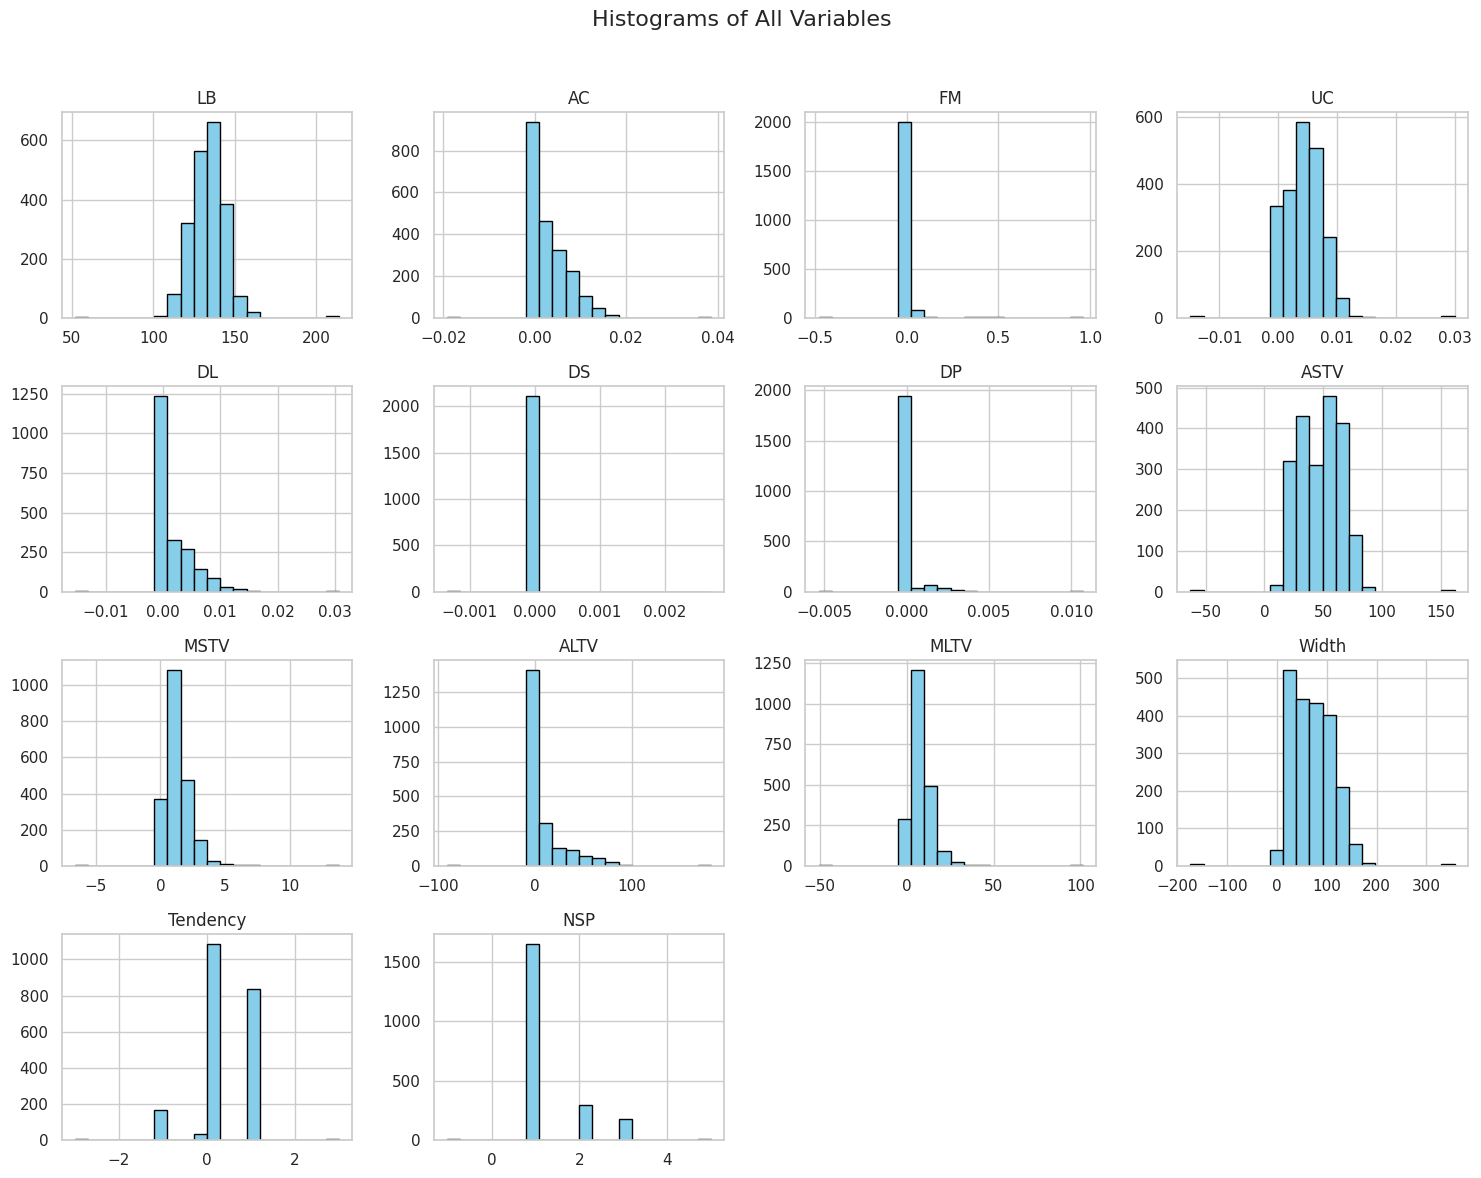

In [17]:
# Histograms for all numerical variables
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

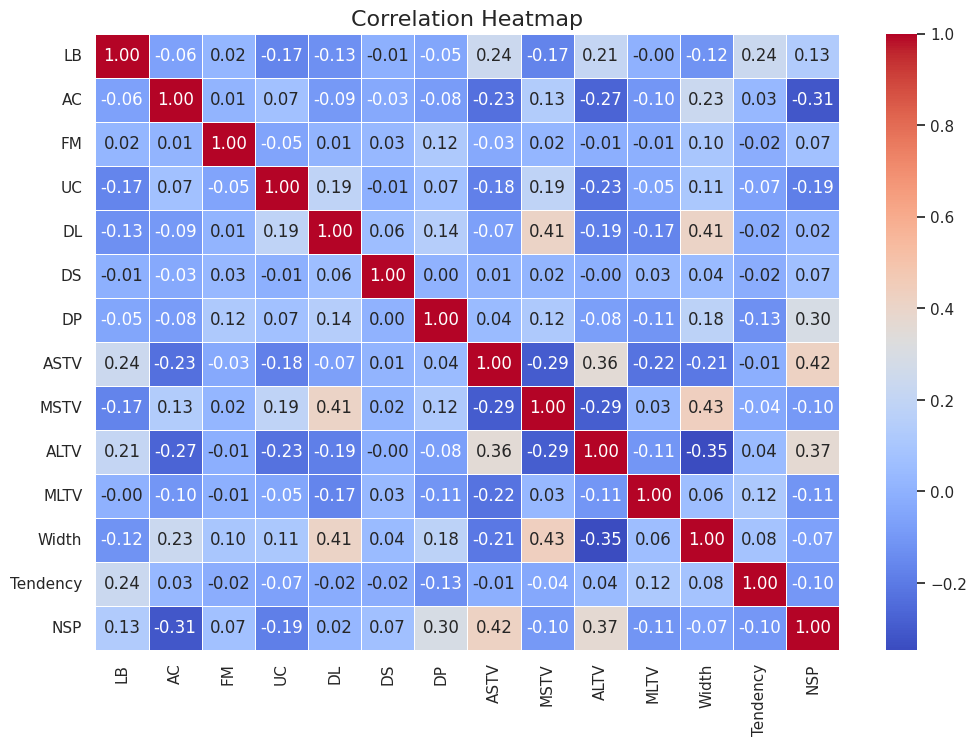

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

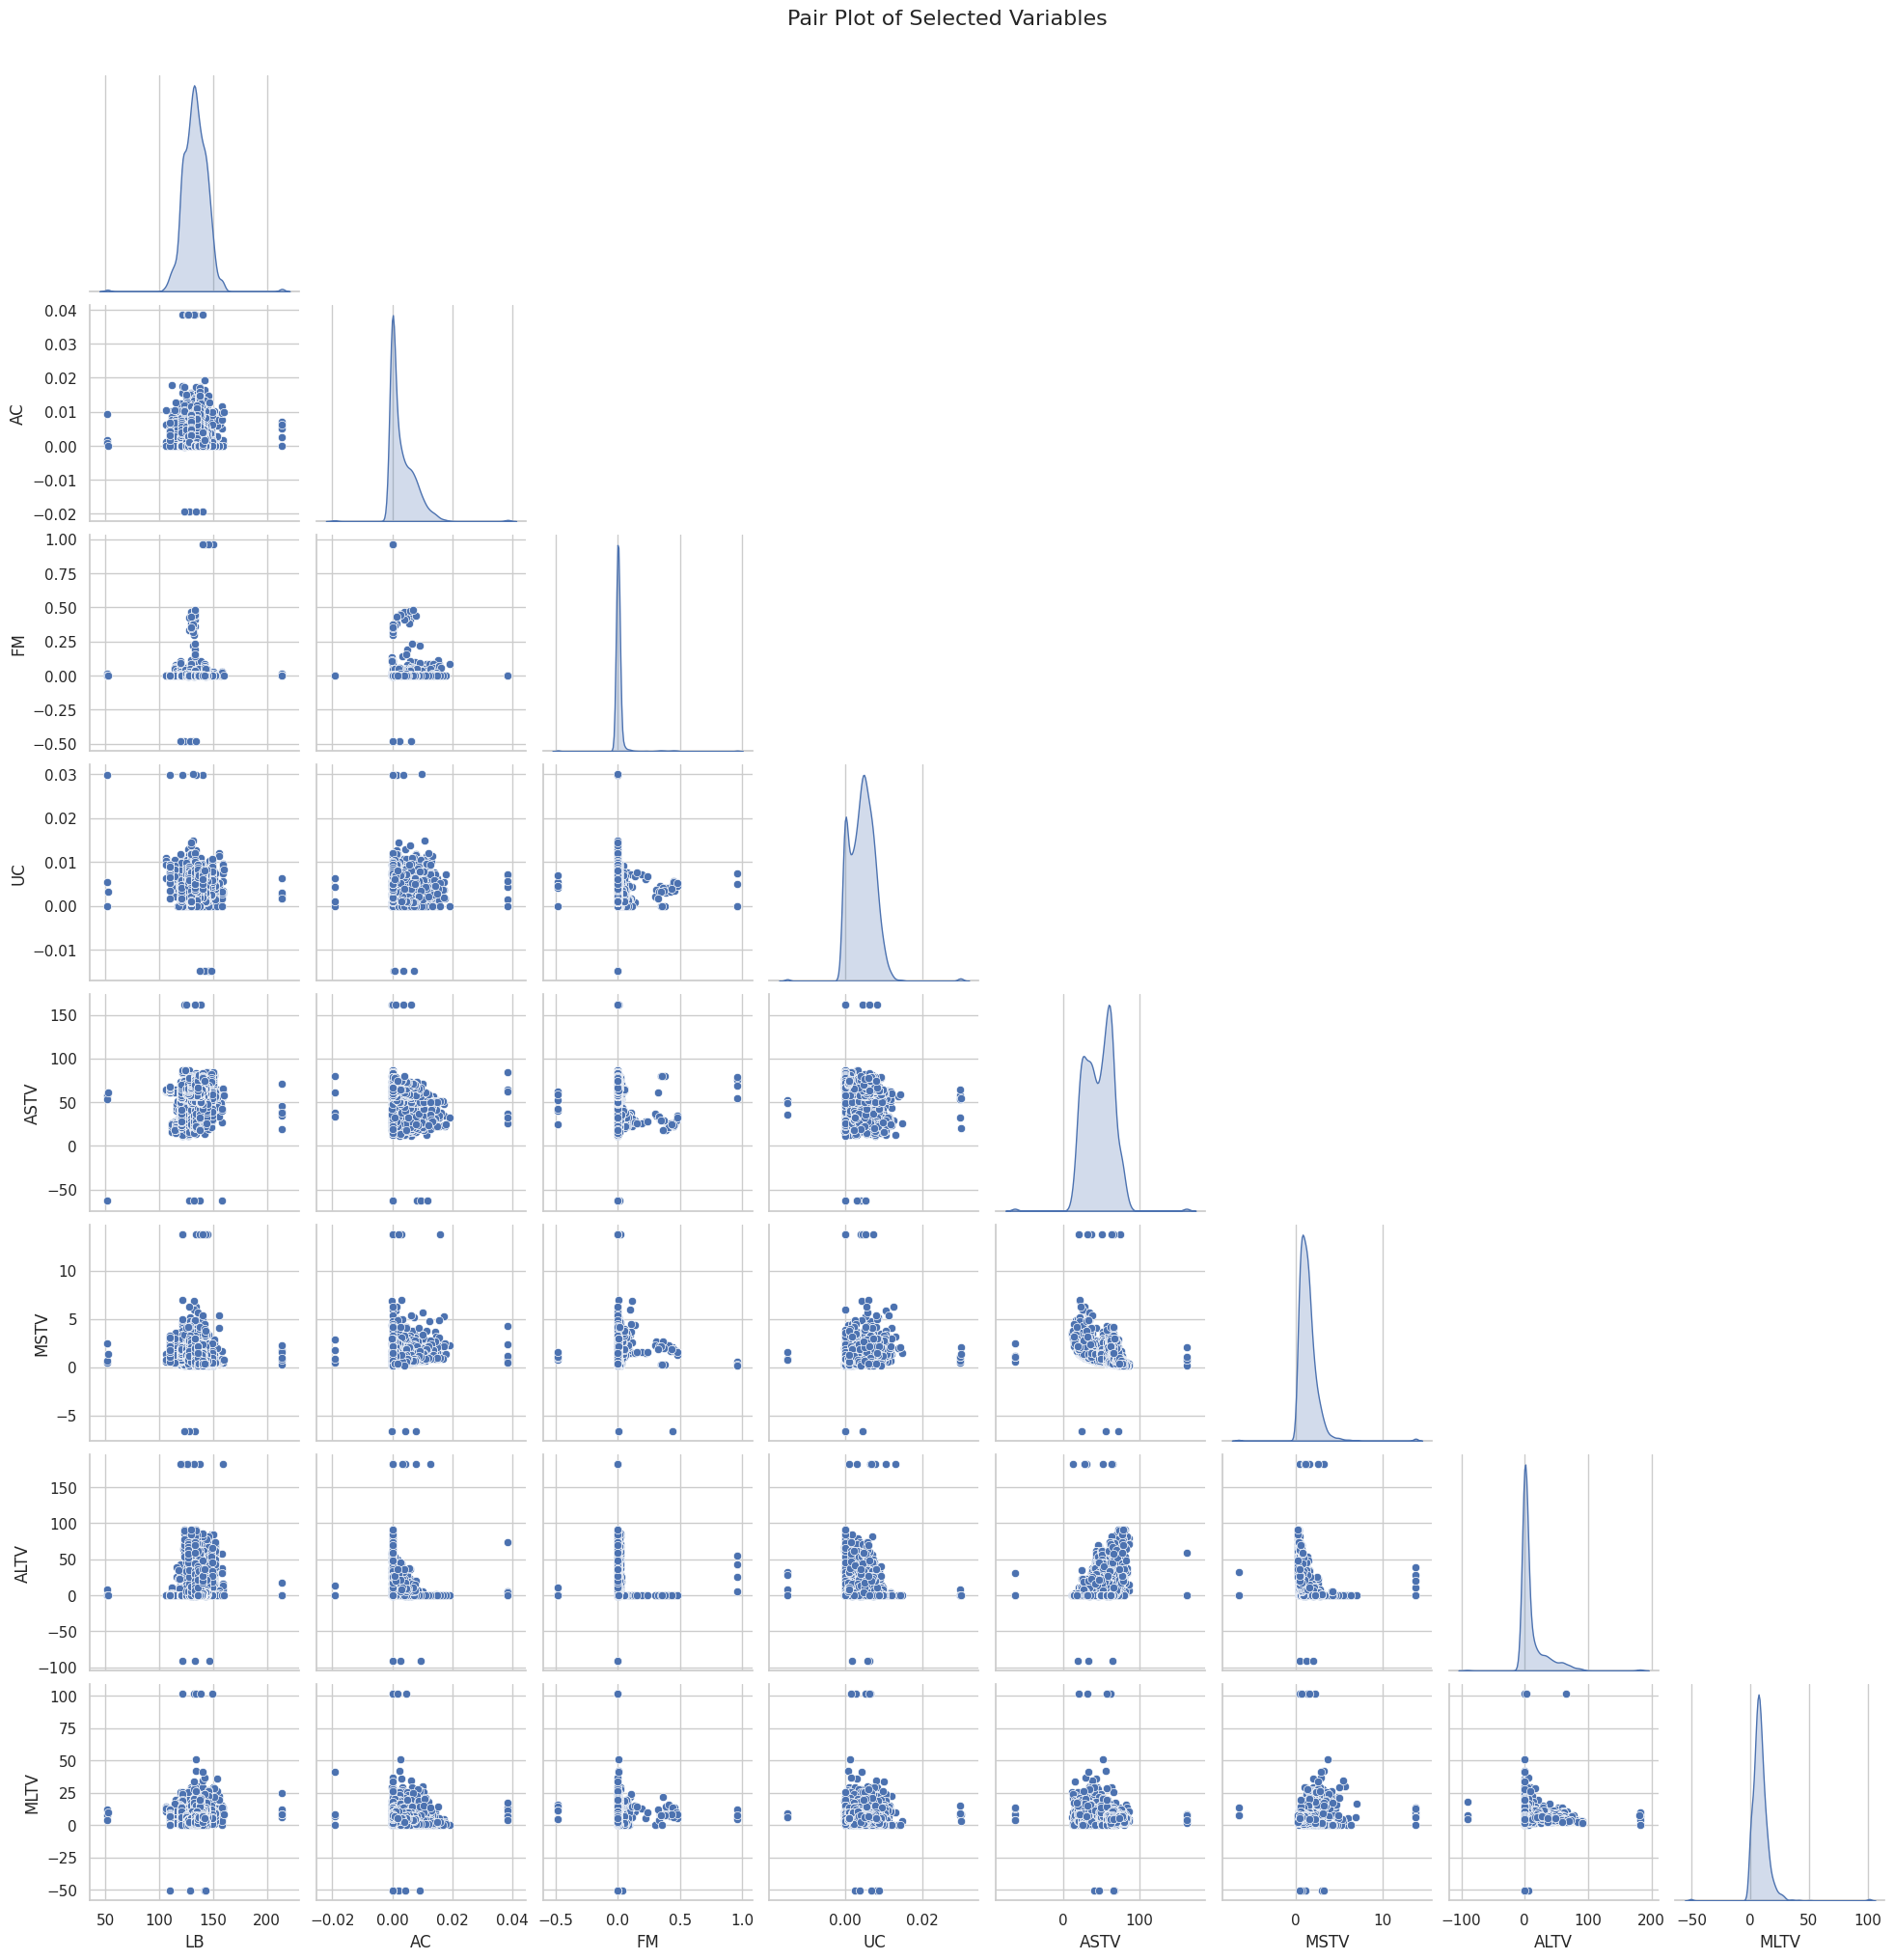

In [19]:
# Pair plot for key variables
selected_columns = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
sns.pairplot(df[selected_columns], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Selected Variables', y=1.02, fontsize=16)
plt.show()

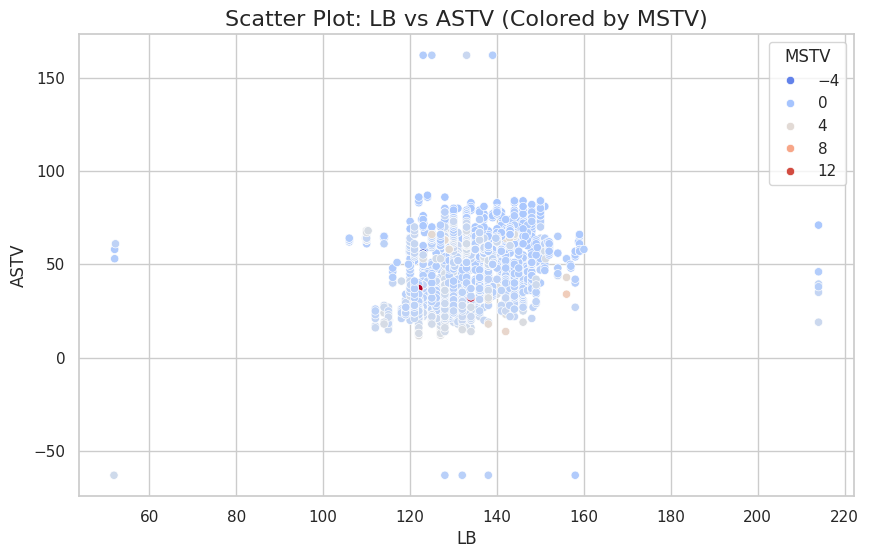

In [21]:
# Scatter plots for relationships between key variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LB', y='ASTV', hue='MSTV', palette='coolwarm')
plt.title('Scatter Plot: LB vs ASTV (Colored by MSTV)', fontsize=16)
plt.show()

# 4. Pattern Recognition and Insights

In [22]:
# Identify correlations
high_correlations = correlation_matrix[correlation_matrix > 0.7].stack().reset_index()
high_correlations = high_correlations[high_correlations['level_0'] != high_correlations['level_1']]
print("\nHigh Correlations (above 0.7):\n", high_correlations)


High Correlations (above 0.7):
 Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [23]:
# Trends and patterns
print("\nObservations from correlation heatmap and scatter plots:")
print("- Variables LB and UC might be inversely correlated with certain variability measures.")
print("- Strong correlation between ASTV and ALTV suggests shared variability patterns.")


Observations from correlation heatmap and scatter plots:
- Variables LB and UC might be inversely correlated with certain variability measures.
- Strong correlation between ASTV and ALTV suggests shared variability patterns.


# 5. Conclusion

In [24]:
print("\nSummary of Insights:")
print("- The dataset contains outliers in several columns that could affect the analysis.")
print("- ASTV and ALTV are highly correlated, which might indicate overlapping information.")
print("- Visualization shows that fetal heart rate (LB) varies significantly with uterine contractions (UC).")


Summary of Insights:
- The dataset contains outliers in several columns that could affect the analysis.
- ASTV and ALTV are highly correlated, which might indicate overlapping information.
- Visualization shows that fetal heart rate (LB) varies significantly with uterine contractions (UC).
